## <center> Re:Zero_Team
    
    
## <center> Sistema de Recomendación Anime (II)
### <center> Adolfo García, Rodrigo Guerrero Vergara, Nicolas Sepulveda Lynch y Pablo Maluenda
### <center> Generación 45

# 1 Descripción del problema - Requerimientos 

# 1.1 Requerimientos

Se nos solicita como empresa **Re:Zero Team**, la creación de  una herramienta que permita entregar recomendaciones sobre qué ver a los usuarios, basados en su historial de votación.

# 1.2 Recursos 


Se tiene dos bases de datos: **anime.csv** y **rating.csv**, las cuales contienen las preferencias de **7.813.737 usuarios** sobre **12.294 observaciones de Anime**. Cada usuario puede agregar un anime a su lista y otorgarle una valoración (rating) y esa data es la compilación de esos ratings.

## 1.2.1 Detalle de recursos

### Anime.csv:
● anime_id: Identificador único del anime.

● name: Nombre completo del anime.


● genre: Lista de géneros (separados por coma) en el que califica el anime.


● type: Tipo de presentación del anime, puede ser: movie, TV, OVA, etc.


● episodes: Número de episodios del anime (1 para el caso películas).


● rating: Evaluación promedio del anime.


● members: Número de miembros de la comunidad que están en el “grupo” del anime.


### Rating.csv:
● user_id: ID de usuario generado aleatoriamente y no identificable.


● anime_id: Anime que el usuario ha calificado.


● rating: Evaluación que el usuario le asigna al anime (-1 en caso de haberlo visto pero no evaluado).



## 2.1  - Importación de las librerias a utilizar

#### Para la correcta realización de nuestro proyecto final, se requiere necesariamente importar librerías no nativas de python, las cuales permitirán realizar el análisis de los datos, la transformación de estos, proceder a construir los modelos predictivos, entrenarlos y validarlos. A continuación se detallarán e importan las librerías y sus versiones con las que elaboramos nuestra herramienta:

In [1]:
#Las librerías que utilizaremos para preprocesar datos son: 
import numpy as np #Versión: 1.23.5
import pandas as pd #Versión: 1.5.2
import matplotlib.pyplot as plt #Versión: 0.13.1
import seaborn as sns #Versión:0.12.1
import glob #Versión: 3.11.0
import missingno #Versión: 0.5.1
import re #Versión: 3.11.1

# Importamos la librería Surprise y sus métodos
from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering #Versión: 1.1.3
from surprise.model_selection import cross_validate #Versión: 1.1.3
from surprise import Reader, Dataset #Versión: 1.1.3
from surprise import accuracy #Versión: 1.1.3 

import scipy as sp  #Versión: 1.3.2 
from sklearn.metrics.pairwise import cosine_similarity  #Versión: 1.2.0 
from scipy.sparse import csr_matrix  #Versión: 1.3.2 
from sklearn.neighbors import NearestNeighbors #Versión: 1.2.0 

from sklearn.feature_extraction.text import CountVectorizer #Versión: 1.2.0 


import warnings #Versión 3.10.5
warnings.filterwarnings('ignore', 'DeprecationWarning') #
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore", category=RuntimeWarning) 

import pickle #Versión: 0.0.12


from math import sqrt #Versión 0.7

from sklearn.model_selection import train_test_split #Versión 1.2.0 
from sklearn.linear_model import LinearRegression #Versión 1.2.0 
from sklearn.linear_model import Lasso #Versión 1.2.0 
from sklearn.svm import SVR #Versión 1.2.0 
from sklearn.neighbors import KNeighborsRegressor #Versión 1.2.0  
from sklearn.metrics import mean_squared_error, mean_absolute_error #Versión1.2.0  

import csv #Versión  1.5.2
import time #Versión 0.7


# 3.- Análisis exploratorio

Previo a la ingeniería de los atributos, se realizarán las siguientes acciones sobre la estructura de los datos:
    
1. Ingesta y comparación de la data.
2. Análisis descriptivo. 
3. Verificación de datos perdidos.
4. Frecuencia de datos posterior a la verificación de datos perdidos.
5. Gráficos distributivos de las variables análizadas.

## 3.1- Ingesta y comparación de la data a trabajar:

Se importarán los dos bases de datos (datasets) suministrados para la elaboración de nuestro proyecto:
    
    -df_rating.csv
    -df_animes.csv

### 3.1.1 Analisis descriptivo de la data suministrada 'anime.csv'.

In [2]:
#Importaremos los dataframe de Rating como df y anime como df2
df_rating = pd.read_csv('rating.csv', on_bad_lines='skip') #rating
df_animes = pd.read_csv('anime.csv', on_bad_lines='skip', sep=";", decimal=",") # anime

In [3]:
df_rating.sample(5) # Tenemos 7.813.737 de observaciones en 'rating.csv'.

,user_id,anime_id,rating
4217256,39976,120,6
6382199,59193,2904,10
2154252,20860,1292,9
3999130,37885,8861,7
6735609,62212,34240,9


<AxesSubplot:>

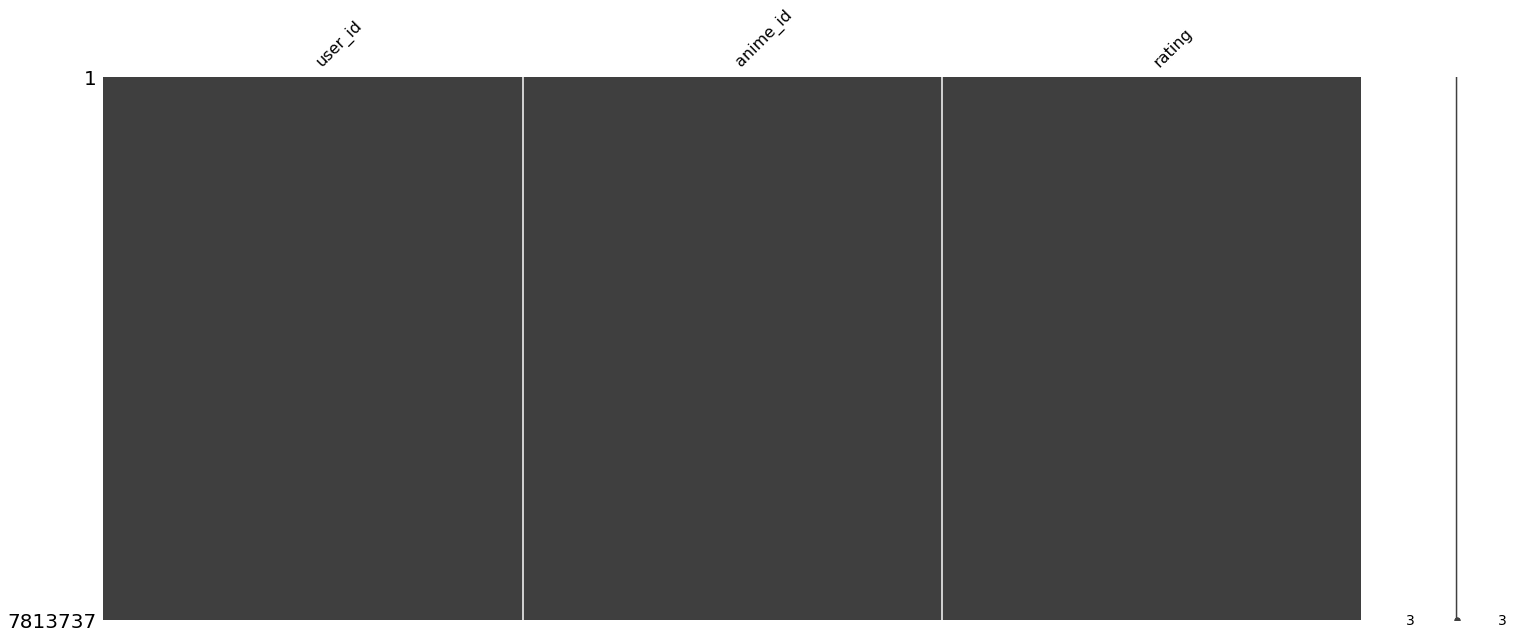

In [4]:
missingno.matrix(df_rating) # Comprobamos los valores nulos en 'rating.csv' con una matriz. Vemos que no hay valores nulos (NaN).

In [5]:
df_animes.sample(5) # En 'anime.csv' solo 12.294 observaciones.

,anime_id,name,genre,type,episodes,rating,members
11701,4084,Inma Youjo,"Fantasy, Hentai, Horror, Supernatural",OVA,5,6.23,1065
10935,34051,Akiba&#039;s Trip The Animation,"Action, Adventure, Ecchi, Supernatural",TV,Unknown,NaN,5889
10227,7980,Shin Obake no Q-tarou,"Comedy, School, Slice of Life, Supernatural",TV,70,5.78,124
4130,11615,Morita-san wa Mukuchi. 2,"Comedy, School, Slice of Life",TV,13,6.80,8788
3930,6964,Yuu☆Yuu☆Hakusho Picture Drama,"Action, Comedy, Demons, Martial Arts, Shounen",Special,1,6.85,4697


<AxesSubplot:>

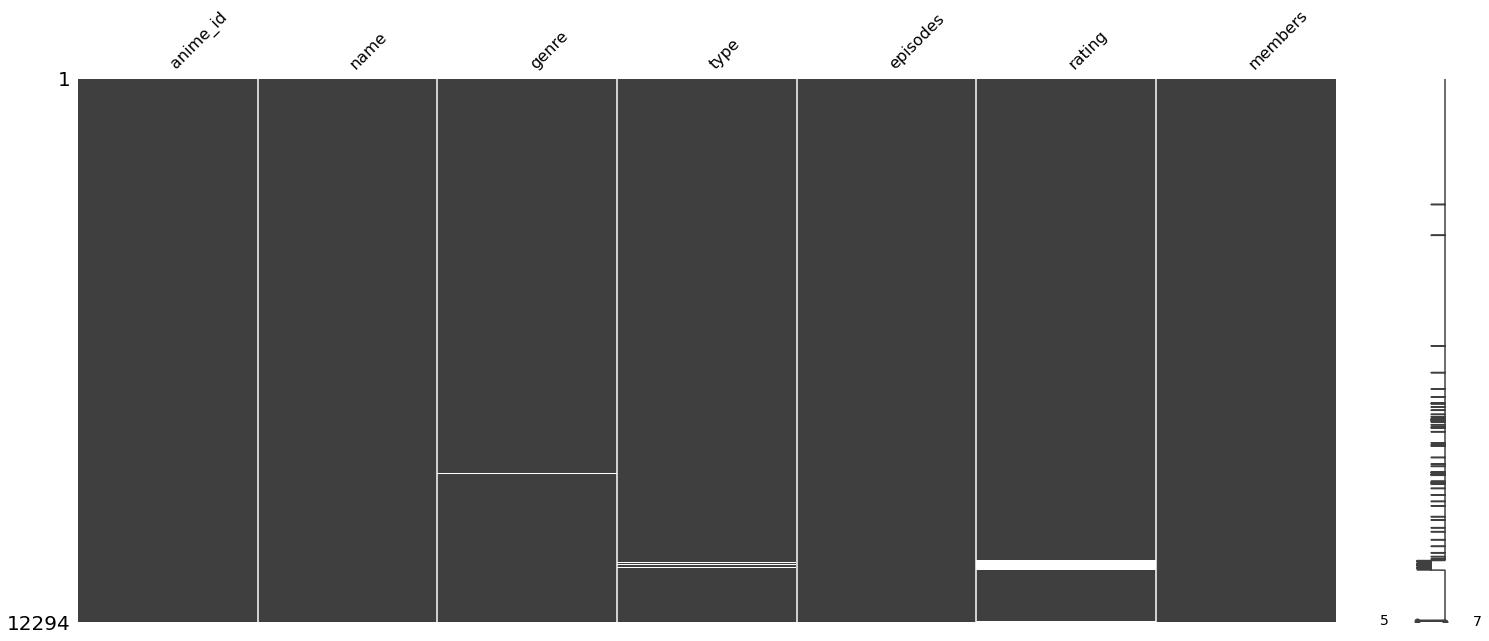

In [6]:
missingno.matrix(df_animes) # Comprobamos que existen valores nulos en 'anime.csv' con una matriz.
                            # En las columnas 'genre', 'type' y 'rating'.

## Realizado la matrix,  observamos  la cantidad de datos nulos en el dataframe 'anime.csv'

In [7]:
df_animes['rating'].isna().value_counts()  # 230 datos nulos en 'rating' en 'anime.csv'

False    12064
True       230
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

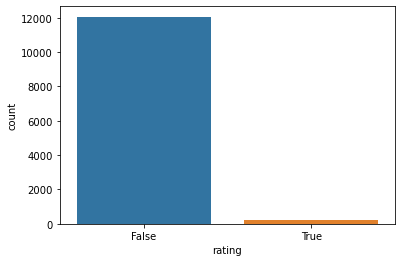

In [8]:
sns.countplot(df_animes['rating'].isna()) # Grafico de 'rating' en 'anime.csv'

__Observamos que en la variable rating es de tipo flotante y posee 230 valores "NA", es decir sin datos, lo que corresponde al 1.9% del total de la data.__

In [9]:
df_animes['genre'].isna().value_counts() # 47 datos nulos en 'genre' en 'anime.csv'.

False    12247
True        47
Name: genre, dtype: int64

<AxesSubplot:xlabel='genre', ylabel='count'>

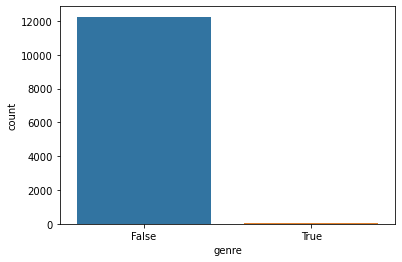

In [10]:
sns.countplot(df_animes['genre'].isna()) # Gráfico de datos nulos de 'genre' en 'anime.csv'

__Observamos que en la variable género (genre) es de tipo flotante y posee 47 valores "NA". Es decir sin datos, lo que corresponde al 0.4% del total de la data.__

In [11]:
df_animes['type'].isna().value_counts() # 25 datos nulos en 'type' en 'anime.csv'

False    12269
True        25
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

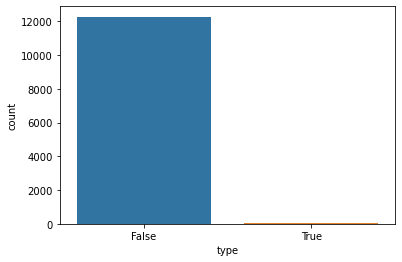

In [12]:
sns.countplot(df_animes['type'].isna()) # Grafico de datos nulos de 'type' en 'anime.csv'

__Observamos que en la variable tipo (type) es de tipo flotante, posee 25 valores "NA". Es decir sin datos, lo que corresponde al 0.2% del total de la data.__

----

In [13]:
# Reemplazamos todo tipo de datos 'Unknown' a -1, que se refiere a animes en emision o sin información de capitulos
df_animes['episodes'] = df_animes['episodes'].replace('Unknown', -1)  
df_animes['episodes'] = df_animes['episodes'].replace(' Unknown', -1) 
df_animes['episodes'] = df_animes['episodes'].replace('Unknown ', -1)

In [14]:
df_animes[df_animes['name'] == 'One Piece'] # Revisamos si queda almacenado, ya que 'One Piece' es 'unknown' en episodios 

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,-1,8.58,504862


__Reemplazamos los capitulos 'Unknown' por -1, ya que están en emision o sin informacion de la cantidad de capitulos en el historico.__

### Ya con la ingesta de las bases de datos suministradas, el análisis descriptivo realizado y el tratamiento de los valores nulos, procedemos a continuar en cómo trataremos nuestro vector objetivo.

## Nuestro vector objetivo en la base de datos'anime.csv' será : 'rating'
__Declaramos el vector objetivo en el dataframe 'anime.csv', en este caso 'rating'.__

In [15]:
# Separamos los géneros después de cada ',' en la celda ingresada de 'anime.csv'.
df1 = df_animes['anime_id'].astype(str) + ', ' + df_animes['genre']
df1 = df1.str.split(', ', expand=True)
df1.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1714,5273,Sports,None,None,None,None,None,None,None,None,None,None,None,None
1803,13333,Music,School,Slice of Life,None,None,None,None,None,None,None,None,None,None
11818,5411,Drama,Fantasy,Hentai,Romance,None,None,None,None,None,None,None,None,None
8396,16794,Action,Sci-Fi,Shounen,None,None,None,None,None,None,None,None,None,None
6677,8241,Comedy,Ecchi,Game,None,None,None,None,None,None,None,None,None,None
929,2471,Adventure,Comedy,Fantasy,Kids,Sci-Fi,Shounen,None,None,None,None,None,None,None
9080,29383,Dementia,Sci-Fi,None,None,None,None,None,None,None,None,None,None,None
833,3713,Mystery,Psychological,Supernatural,None,None,None,None,None,None,None,None,None,None
9616,33724,Action,Fantasy,Game,None,None,None,None,None,None,None,None,None,None
6105,8919,Adventure,None,None,None,None,None,None,None,None,None,None,None,None


In [16]:
df_animes['type'].value_counts() #Realizamos un value counts (conteo de valores) para obtener la frecuencia de cada tipo

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [17]:
# Generamos una lista y aplicamos una función para separar correctamente el genero, como un valor independiente.
lst = df1.columns.to_list()
for i in range(len(lst)):
    lst[i] = 'col_' + str(i)

In [18]:
df1.columns = lst 

In [19]:
# Realizamos un melt para el pivoteo de lo nuevos valores.
df1 = pd.melt(df1, id_vars="col_0")
df1 = df1[['col_0', 'value']]
df1['valor'] = 1 
df1.head(5)

,col_0,value,valor
0,32281,Drama,1
1,5114,Action,1
2,28977,Action,1
3,9253,Sci-Fi,1
4,9969,Action,1


In [20]:
# Generamos un nuevo objeto eliminando los generos duplicados.
df1 = df1.drop_duplicates()
df1 = df1.dropna()
df1.head(n = 5)

,col_0,value,valor
0,32281,Drama,1
1,5114,Action,1
2,28977,Action,1
3,9253,Sci-Fi,1
4,9969,Action,1


In [21]:
# Transformamos los géneros de la columna 0 a enteros (int).
df1['col_0'] = df1['col_0'].astype('int64')

In [22]:
# Generamos un nuevo objeto en el cual pivoteamos la tabla y dejamos los 'NaN' con valor '0'. 
df2 = pd.pivot_table(df1, values='valor', index='col_0', columns=['value'])
df2 = df2.reset_index()
df2 = df2.fillna(0)

In [23]:
# Mostramos todas las columnas de género
with pd.option_context("display.max_columns", None):
    display(df2)

value,col_0,Action,Adventure,Cars,Comedy,Dark Fantasy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Idol,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Sclice of Life,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12242,34514,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12243,34519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12244,34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12245,34525,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
# Vemos los géneros ya separados, contamos con 45 generos.
df2.columns

Index(['col_0', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dark Fantasy',
       'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem',
       'Hentai', 'Historical', 'Horror', 'Idol', 'Josei', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Sclice of Life', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object', name='value')

In [25]:
# Realizamos un ejemplo para validar su correcta asignacion. 
df_animes[df_animes['anime_id'] == 9253]

,anime_id,name,genre,type,episodes,rating,members
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


In [26]:
# Realizamos un ejemplo para validar su correcta asignación.
df1[df1['col_0'] == 9253]

,col_0,value,valor
3,9253,Sci-Fi,1
12297,9253,Thriller,1


## Realizada la separación de cada género por cada animé, esta data podrá ser utilizada para ser ingresada a los modelos correspondientes, y generar la herramienta de recomendación de anime.


In [27]:
df_animes['episodes'].value_counts() #  # Realizamos una frecuencia para observar que existen muchos animes/peliculas con 5677 observaciones

1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: episodes, Length: 187, dtype: int64

__Observamos que la gran mayoría de observaciones son películas o animes de un capítulo.__

In [28]:
df_animes['rating'].mean() # Media rating en 'anime.csv'

6.473901690981445

__Observamos que la puntuación promedio de los animes es de 6.47.__

<AxesSubplot:xlabel='rating', ylabel='Count'>

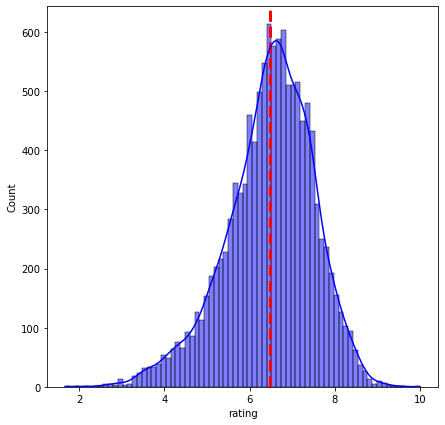

In [29]:
plt.figure(figsize=[7,7])
plt.axvline(df_animes['rating'].mean(), color='red', linestyle='--', linewidth='3')
sns.histplot(df_animes['rating'], kde=True,color='blue') # la media de rating en 'anime.csv' es '6.4', 
                            

__Observamos que la variable 'rating' en el dataframe de 'anime.csv' concentra los valores entre 6 y 7.5 puntos de rating, ubicando la media en 6.47.Su distribución es de tipo asimétrica negativa, lo cual implica que la media se sitúa a la izquierda del grueso de los datos.__

In [30]:
# Vamos a mostrar el anime que presenta mayor y  menor rating respectivamente.
print('La puntuacion del anime mejor calificado es de:',df_animes['rating'].max(), 'puntos y el peor calificado es de:',df_animes['rating'].min(),'puntos.') # el anime mas bajo calificado es de 1.67 y el mas alto es 10.0

La puntuacion del anime mejor calificado es de: 10.0 puntos y el peor calificado es de: 1.67 puntos.


In [31]:
df_animes['type'].value_counts() # TV es la categoría más poblada y música (music) la menos poblada.
                                    # con 3.787 datos a 'TV' y 488 a 'Music'.

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [32]:
# Revisamos los tipos de anime.
pd.get_dummies(df_animes['type'])

,Movie,Music,ONA,OVA,Special,TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
12289,0,0,0,1,0,0
12290,0,0,0,1,0,0
12291,0,0,0,1,0,0
12292,0,0,0,1,0,0


__La mayor cantidad de datos por categoría es 'TV' y la menor es 'Music'.__

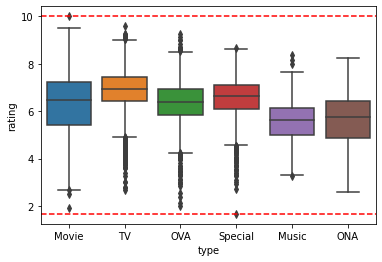

In [33]:
sns.boxplot(df_animes['type'], df_animes['rating'])
plt.axhline(df_animes['rating'].min(), color='red', linestyle='--')
plt.axhline(df_animes['rating'].max(), color='red', linestyle='--')

__Realizamos un gráfico de cajas que representa el 'rating' respecto al tipo ('type'), vemos que el anime mejor calificado corresponde a una pelicula y el peor corresponde a un anime especial. Los mejores evaluados son los animes en emisión, que corresponden a la categoria 'TV'.__

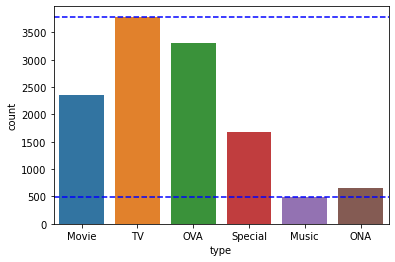

In [34]:
# Generamos un gráfico que representa el conteo de animes por tipo ('type').
sns.countplot(df_animes['type'])
plt.axhline(df_animes['type'].value_counts().min(), color='blue', linestyle='--')
plt.axhline(df_animes['type'].value_counts().max(), color='blue', linestyle='--')

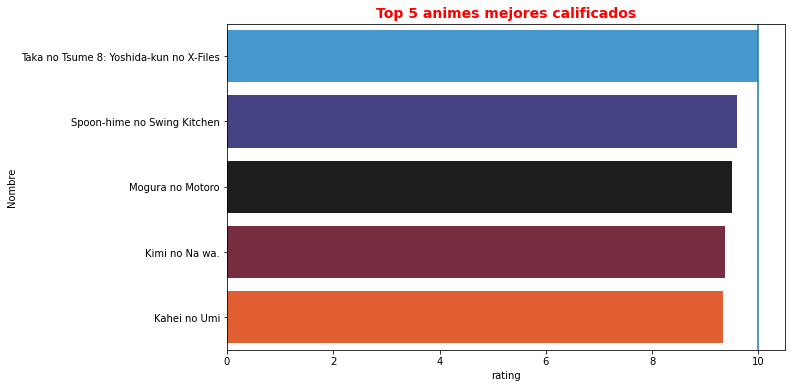

In [35]:
# Generamos un gráfico con los animes mejor calificados, en base a su 'rating'.
sort_avg = df_animes.sort_values('rating',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='rating',y='name',data=sort_avg.head(5),saturation=1, palette="icefire")
plt.axvline(df_animes['rating'].max())
plt.ylabel('Nombre')
plt.xlabel('rating',fontsize=10)
plt.title('Top 5 animes mejores calificados',fontsize=14,color = 'red',fontweight='bold')
plt.show()

__Observamos que dentro de los 5 animes mejores catalogados, dos de estos corresponden a películas y el resto son animes en emisión, ya sea por televisión o plataformas de streaming.__

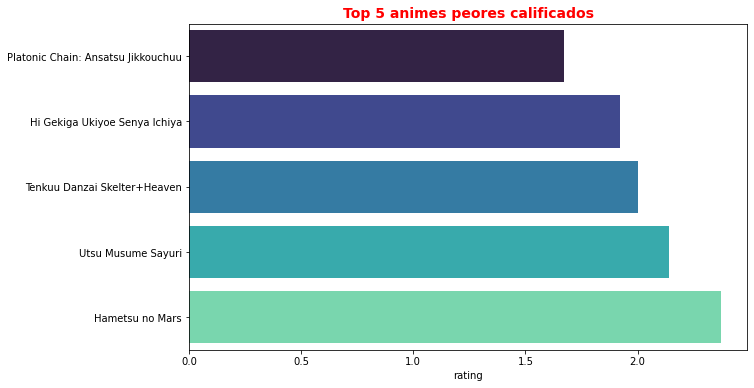

In [36]:
# Generamos un gráfico con los animes peor calificados, en base a su 'rating'.
sort_dec = df_animes.sort_values('rating',ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(x='rating',y='name',data=sort_dec.head(5),saturation=1, palette="mako")
plt.ylabel(None)
plt.xlabel('rating',fontsize=10)
plt.title('Top 5 animes peores calificados',fontsize=14,color = 'red',fontweight='bold')
plt.show()

__Observamos que dentro de los 5 animes peores catalogados, tres de estos corresponden a películas y el resto son animes en emisión, ya sea por televisión o plataformas de streaming.__ 

## 3.-Análisis descriptivo y preselección de atributos

### 3.1.2. Análisis descriptivo de la data suministrada 'rating.csv'.

In [37]:
# Observamos que las 3 columnas son de tipo entero (int)
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [38]:
df_rating['rating'].mean() # media de 'rating' en 'rating.csv' 6.14

6.144029546937656

<AxesSubplot:xlabel='rating', ylabel='count'>

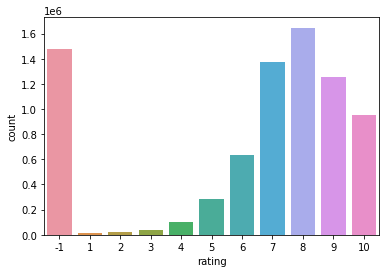

In [39]:
# Generamos un gráfico que representa la cantidad de observaciones existen en base al rating
sns.countplot(df_rating['rating'])

__Observamos que se encontraban tres variables dentro de esta data, la cual por el momento no requiere mayor tratamiento. Sin embargo, se observan muchas observaciones con "-1", lo cual indica que son usuarios que no han votado por cierto animé__. 

__Todo esto bajo el supuesto que las clasificaciones a los anime se realizaron al terminar dicho anime, pelicula, etc.__

----

##  4. Modelamiento - Modelos candidatos

In [40]:
# Reemplazamos valores string 'NA', por NA's
df_animes['rating'] = df_animes['rating'].replace("NA", np.nan)
df_animes['genre'] = df_animes['genre'].replace("NA", np.nan)
df_animes['type'] = df_animes['type'].replace("NA", np.nan)

# Para luego reemplazar estos NA's por lo siguiente
df_animes['genre'].fillna('Sin info',inplace=True)
df_animes['type'].fillna('Sin info',inplace=True)
df_animes['rating'].fillna(0,inplace=True)

In [41]:
# Descartamos los valores -1 de la data.
# df_rating_clean = df_rating[df_rating['rating'] != -1].copy()

# Reemplazamos valores -1 con 0.
df_rating['rating'].replace(-1, 0, inplace=True)

In [42]:
# Para posteriormente recomendar 
df_rating_recomen = df_rating.copy()
df_rating_recomen

,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


## 4.1 Filtros colaborativos basados en modelos 
### Pre proceso

A continuación se extrae una muestra del 10% del total de usuarios de la base de datos. Su comportamiento presenta la misma distribución que tiene la base total en relación a los ratings. Se toma esta decisión para reducir los tiempos de entrenamiento en los modelos propuestos y se obtienen metricas bastante similares si se utiliza más datos..

<AxesSubplot:xlabel='rating', ylabel='count'>

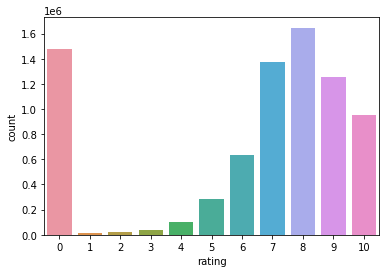

In [43]:
## Asi es la distribución de valoraciones en el df original.
sns.countplot(df_rating['rating'])

In [44]:
## Son 73515 usuarios distintos, posteriormente se extrae una muestra del 10%
len(df_rating['user_id'].unique())

73515

In [45]:
# Se crea dataframe con los usuarios
usuarios_ysuID = df_rating['user_id'].unique().tolist()
df_usuarios_ysuID = pd.DataFrame(usuarios_ysuID, columns=['user_id'])
df_usuarios_ysuID

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
73510,73512
73511,73513
73512,73514
73513,73515


In [46]:
# Se obtiene una muestra del 10% del total de usuarios 
df_usuarios_ysuID = df_usuarios_ysuID.sample(frac=0.1, random_state=1712)#era 1712
df_usuarios_ysuID

,user_id
1721,1722
52368,52370
57298,57300
54366,54368
15721,15722
...,...
5995,5996
37579,37580
32497,32498
1649,1650


In [47]:
#Se cruza el df rating original con los usuarios de la muestra
df_rating = pd.merge(df_usuarios_ysuID, df_rating, on='user_id', how='inner')
df_rating

,user_id,anime_id,rating
0,1722,121,10
1,1722,223,9
2,1722,246,5
3,1722,269,0
4,1722,356,9
...,...,...,...
764676,22207,30296,0
764677,22207,30307,0
764678,22207,30344,0
764679,22207,30363,0


<AxesSubplot:xlabel='rating', ylabel='count'>

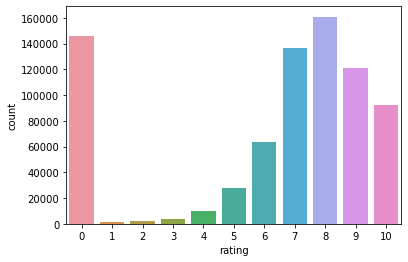

In [48]:
# La muestra obtenida, presenta la misma distribución de la poblacion total en cuanto a la variable objetivo 'rating'
sns.countplot(df_rating['rating'])

### Armado de la tabla de datos para animes, género y tipo (df_animes_gen_y_type)

Como utilizaremos filtro basado en contenido, se realiza un preproceso de los atributos genero y tipo. Con la finalidad de éstos dos tributos sean binarizados y puedan entrar a los distintos modelos a iterar.

In [49]:
# Se prepara df con género y tipo binarizados
df_animes_gen_y_type = df_animes.drop(columns=['name','episodes','rating','members'])
df_animes_gen_y_type

,anime_id,genre,type
0,32281,"Drama, Romance, School, Supernatural",Movie
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,"Sci-Fi, Thriller",TV
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...
12289,9316,Hentai,OVA
12290,5543,Hentai,OVA
12291,5621,Hentai,OVA
12292,6133,Hentai,OVA


In [50]:
# Se realiza arreglo de variables para poder posteriormente binarizarlas
df_animes_gen_y_type['genre'] = df_animes_gen_y_type['genre'].str.replace(" ", "")
df_animes_gen_y_type['genre'] = df_animes_gen_y_type['genre'].str.split(',')
df_animes_gen_y_type['type'] = df_animes_gen_y_type['type'].str.replace(" ", "")
df_animes_gen_y_type['type'] = df_animes_gen_y_type['type'].str.split(',')
df_animes_gen_y_type.head()

,anime_id,genre,type
0,32281,"[Drama, Romance, School, Supernatural]",[Movie]
1,5114,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",[TV]
2,28977,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV]
3,9253,"[Sci-Fi, Thriller]",[TV]
4,9969,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV]


In [51]:
# Se binarizan las variables asociadas a tipo y genero
genero = []
tipo = []
for index, row in df_animes_gen_y_type.iterrows():
    genero.append(index)
    for genre in row['genre']:
        df_animes_gen_y_type.at[index, genre] = 1
    for tipo in row['type']:
        df_animes_gen_y_type.at[index, tipo] = 1

df_animes_gen_y_type.head(3)

,anime_id,genre,type,Drama,Romance,School,Supernatural,Movie,Action,Adventure,...,ONA,Kids,ShoujoAi,Sininfo,DarkFantasy,Idol,ScliceofLife,Hentai,Yaoi,Yuri
0,32281,"[Drama, Romance, School, Supernatural]",[Movie],1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5114,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",[TV],1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28977,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Los tres tipos de anime que lideran en esta tabla binarizada corresponde a un de tipo de película (movie) y dos de televisión (TV)__

In [52]:
# Los valores NaN se reemplazan con 0
df_animes_gen_y_type = df_animes_gen_y_type.fillna(0)
df_animes_gen_y_type.shape
df_animes_gen_y_type.head()

,anime_id,genre,type,Drama,Romance,School,Supernatural,Movie,Action,Adventure,...,ONA,Kids,ShoujoAi,Sininfo,DarkFantasy,Idol,ScliceofLife,Hentai,Yaoi,Yuri
0,32281,"[Drama, Romance, School, Supernatural]",[Movie],1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5114,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",[TV],1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28977,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9253,"[Sci-Fi, Thriller]",[TV],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9969,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Buscamos los usuarios que han hecho mas de 'n' valoraciones
Esta función permite evitar animes que (según su tipo) no sean lo suficientemente representativos dado las cantidad de votaciones.

In [53]:
rantings_usuarios = df_rating.groupby(by = ['user_id'])['rating'].count().reset_index().rename(columns = {'rating': 'num_ratings'})
print(rantings_usuarios.shape)
rantings_usuarios.head()

(7352, 2)


,user_id,num_ratings
0,9,1
1,16,11
2,17,601
3,27,80
4,31,87


In [54]:
# Se filtra usuario que hayan realizado 'n' >= cantidad de valoraciones
cantidad_votaciones = 20
usuarios_masN = rantings_usuarios.query('num_ratings >= @cantidad_votaciones')
usuarios_masN.head()

,user_id,num_ratings
2,17,601
3,27,80
4,31,87
5,40,59
6,50,90


In [55]:
# Se mergea la base 'df_rating', con el filtro realizado
df_rating_filter = pd.merge(df_rating, usuarios_masN, on='user_id')
df_rating_filter.drop(columns='num_ratings', inplace=True)
print(df_rating_filter.shape)
df_rating_filter.head()

(749035, 3)


,user_id,anime_id,rating
0,1722,121,10
1,1722,223,9
2,1722,246,5
3,1722,269,0
4,1722,356,9


### Split data 

In [56]:
# Separamos data en entrenamiento y vector objetivo
X = df_rating_filter.drop(columns='rating')
y = df_rating_filter["rating"].values 


# Separamos la data en entrenamiento, validación y testeo
# Particiones de 70% - 15% - 15% respectivamente
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=1612)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=1612)

# Creamos df de entrenamiento con las variables correspondientes
train_df = X_train.copy()
train_df["rating"] = y_train

train_df

,user_id,anime_id,rating
398255,21688,14653,6
612036,3295,3701,9
693739,42571,24,9
613466,51882,6572,8
605497,54657,3420,9
...,...,...,...
484540,9849,17269,7
417212,66305,1922,0
200816,69363,14967,8
670953,5061,6747,5


### Modelo baseline, utilizando el promedio de cada anime como predicción.

Se utiliza como valor predicho del rating, lo que implica a cada usuario el promedio del rating por anime. Este modelo baseline es el que consideramos como lo que actualmente se usa, y lo que tomaremos como referencia al comparar los modelos iterados con la métrica del error cuadrático medio (RMSE).

In [57]:
# Extra el promedio de rating del train_df
baseline_y_pred = pd.DataFrame(train_df.groupby('anime_id')['rating'].mean())

# Creating a dataframe for the validation data (y_true) in order to calculate RMSE of the baseline model
val_anime_dict = {'anime_id': X_val["anime_id"], 'rating_real': y_val}  
val_anime_df = pd.DataFrame(val_anime_dict)

# Se aplica merge a ambos df con anime_id como primary key
y_pred_and_y_true = pd.merge(baseline_y_pred, val_anime_df, on='anime_id')
baseline_y_pred_vs_y_true = y_pred_and_y_true.rename(columns={"rating": "rating_predict"})

baseline_y_pred_vs_y_true

,anime_id,rating_predict,rating_real
0,1,7.680320,10
1,1,7.680320,0
2,1,7.680320,9
3,1,7.680320,7
4,1,7.680320,7
...,...,...,...
112139,34240,6.398058,8
112140,34240,6.398058,7
112141,34240,6.398058,9
112142,34240,6.398058,7


In [58]:
# Las películas que no han tenido rating en el train_df, se le imputa la media del rating del vector de validación
baseline_y_pred_vs_y_true['rating_predict'] = baseline_y_pred_vs_y_true['rating_predict'].replace(0.0, y_val.mean())
baseline_y_pred_vs_y_true

,anime_id,rating_predict,rating_real
0,1,7.680320,10
1,1,7.680320,0
2,1,7.680320,9
3,1,7.680320,7
4,1,7.680320,7
...,...,...,...
112139,34240,6.398058,8
112140,34240,6.398058,7
112141,34240,6.398058,9
112142,34240,6.398058,7


In [59]:
# Se calcula el RMSE y MAE para el modelo baseline
print("RMSE modelo baseline: ", round(sqrt(mean_squared_error(baseline_y_pred_vs_y_true["rating_real"],
                                                             baseline_y_pred_vs_y_true["rating_predict"])),3))

print("MAE modelo baseline: ", round(mean_absolute_error(baseline_y_pred_vs_y_true["rating_real"],
                                                             baseline_y_pred_vs_y_true["rating_predict"]),3))

RMSE modelo baseline:  3.311
MAE modelo baseline:  2.597


### 4.2.-Filtro basado en contenido
Los filtros basados en contenido tienen el contenido como base de la predicción, en este caso genero y tipo, en lugar de tener al usuario. Es decir, utiliza las características del anime para hacer las recomendaciones.

In [60]:
# Se unen los train_df con df_animes_gen_y_type y se lanzan (dropean) las variables irrelevantes
content_train_df = pd.merge(train_df, df_animes_gen_y_type, on='anime_id')
content_train_df.drop(columns=['anime_id','genre','type'], inplace=True)
content_train_df

,user_id,rating,Drama,Romance,School,Supernatural,Movie,Action,Adventure,Fantasy,...,ONA,Kids,ShoujoAi,Sininfo,DarkFantasy,Idol,ScliceofLife,Hentai,Yaoi,Yuri
0,21688,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14465,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47651,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3497,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62907,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524319,17095,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
524320,47995,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
524321,72936,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524322,68381,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Se crea una lista de lista con el vector objetivo 'rating', agrupado por 'user_id'
y_grouped_by_user = content_train_df.groupby(["user_id"])
y_train_listed = []

for i, j in y_grouped_by_user:
    y_train_listed.append(j["rating"].values) 
    
# Se observa lista del primer usuario
y_train_listed[0]

array([ 7,  8,  5,  8,  8,  9,  7,  8,  8,  0,  8,  8,  6,  3,  9,  5,  8,
        7,  7,  0,  3,  9,  8,  8,  7,  8,  8,  5,  9,  8,  7,  8,  6,  9,
        9,  7,  7, 10,  0,  0,  8,  4,  8,  6,  8,  7,  8,  0,  7,  8,  7,
        5,  7,  6,  0,  7,  8,  5,  8,  5,  7,  5,  8,  7,  9,  8,  0,  6,
        4,  6,  0,  8, 10,  9,  7,  9,  7,  8,  3,  8,  0,  9,  8,  6,  4,
        7,  5,  5,  8,  0,  4,  8,  7,  7,  0,  5,  8,  9,  0,  7,  6,  5,
        6,  0,  8,  9,  9,  7,  0,  9,  7,  7,  5,  8,  8,  8,  8,  7,  6,
        7,  7,  9,  0,  0,  7,  9,  0,  6,  8,  0,  5,  2,  7,  0,  0,  6,
        0, 10,  0,  6,  0,  7,  0,  6,  0,  7,  9,  7,  8,  7,  6,  7,  9,
        0,  8,  6,  5,  0,  9,  0,  8,  0,  0,  7,  8,  5,  7,  9,  9,  8,
        0,  0,  7,  0,  6,  8, 10,  5,  8,  0,  8,  9,  9,  0,  0,  0,  8,
        5,  8,  8,  7,  5,  9,  0,  4,  7,  8,  8,  6,  5,  0,  4,  7,  6,
        0,  0,  8,  1,  7,  9,  7,  8, 10,  0,  8,  7,  7,  0,  2,  0, 10,
        8,  7,  0,  6,  6

In [62]:
# Se crea dropea columna 'rating' y se crea df de los géneros y tipo de anime agrupados por 'usuario_id'
content_train_df.drop(columns='rating', inplace=True)
x_grouped_by_user = content_train_df.groupby(["user_id"])
x_train_listed = []

for user_id, group in x_grouped_by_user:
    x_train_listed.append(group.drop(columns='user_id'))
    
# Se observa el set de entrenamiento de genero y tipo para el primer usuario
x_train_listed[0]

,Drama,Romance,School,Supernatural,Movie,Action,Adventure,Fantasy,Magic,Military,...,ONA,Kids,ShoujoAi,Sininfo,DarkFantasy,Idol,ScliceofLife,Hentai,Yaoi,Yuri
2581,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8135,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10068,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Se crea un nuevo df para la data animes
all_animes = df_animes_gen_y_type.drop(columns=['anime_id', 'genre','type'])
all_animes

,Drama,Romance,School,Supernatural,Movie,Action,Adventure,Fantasy,Magic,Military,...,ONA,Kids,ShoujoAi,Sininfo,DarkFantasy,Idol,ScliceofLife,Hentai,Yaoi,Yuri
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Preparación de la data de validación

In [64]:
# Se crean matrices de 2 dimensiones para la data de validación para el calculo del error cuadrático medio (RMSE)

# Se listan los user_id en el mismo orden que los df agrupados
user_ids = []
for user_id, group in x_grouped_by_user:
    user_ids.append(user_id)
    
# Se listan los anime_id en el mismo orden que en el df de animes  
anime_ids = df_animes_gen_y_type["anime_id"].values

# Se crea la matrix, eje 1 user_ids, eje 2 anime_id. Los valores corresponden a los rating de los datos de validacion
df_val = X_val.copy()
df_val["rating"] = y_val

# Creamos la matriz validación vacía
validation_matrix = pd.DataFrame(index=user_ids, columns=anime_ids) 

# Se completa con los ratings
for array in df_val.to_records():  # Se rellena las valoraciones verdaderas como elementos
    user = array['user_id']
    anime = array['anime_id']
    true_rating = array['rating']
    validation_matrix.loc[user][anime] = true_rating
    
validation_matrix

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creación de los distintos modelos de filtro basados en contenido

In [65]:
# Se crea grilla con los diferentes modelos a iterar
ml_algorithms = {"Linear regression": LinearRegression(), 
                 "Lasso": Lasso(alpha=1.0, max_iter=10000),
                 "KNN_5": KNeighborsRegressor(n_neighbors=5),
                 "KNN_7": KNeighborsRegressor(n_neighbors=7),
                 "SVR": SVR(C=1.0)}

# Se guardan en listas los modelos utilizados y respectivo RMSE
CBF_models_listed = []
RMSE_CBF_listed = []
MAE_CBF_listed = []

count = 1

# For loop para cada modelo en la grilla
for name, ml_alg in ml_algorithms.items():
    # Create an empty list for predictions
    CBF_predictions = []
    
    # Esto solo para saber en que parte del proceso de iterado va
    print(f'Empezamos con el modelo {name}')
    
    # Para cada usuario en el set de entrenamiento
    for i, x in enumerate(x_train_listed):
        # Se ajusta un modelo
        ml_alg.fit(x_train_listed[i], y_train_listed[i])
        # Se predicen todos los rating para este usuario para todos los animes
        prediction = ml_alg.predict(all_animes)
        prediction = np.clip(prediction, 1, 10)  # Las predicciones deben ser minimo 1 y maximo 10
        # Se anexan las predicciones a la lista creada anteriormente
        CBF_predictions.append(prediction)
    
    count +=1

    # Se crea un df con las predicciones
    df_predict = pd.DataFrame(CBF_predictions, index=user_ids, columns=anime_ids)

    # Se crea un df solo con las predicciones para las combinaciones anime-usuario que aparecen en los datos de validación
    num_actual = validation_matrix.to_numpy().flatten()[validation_matrix.notna().to_numpy().flatten()]
    num_predict = df_predict.to_numpy().flatten()[validation_matrix.notna().to_numpy().flatten()]

    # Se calcula el RMSE para el modelo basado en contenido y se añade el resultado a la lista
    RMSE_CBF_listed.append(sqrt(mean_squared_error(num_predict, num_actual)))
    MAE_CBF_listed.append(mean_absolute_error(num_predict, num_actual))
    CBF_models_listed.append(name)


# Se muestran los resultados en pantalla
RMSE_CBF_df = pd.DataFrame({"Model": CBF_models_listed, "RMSE": RMSE_CBF_listed, "MAE": MAE_CBF_listed})
print("RMSE de los diferentes modelos filtro basado en contenido considerando genero y tipo de anime:")
RMSE_CBF_df

Empezamos con el modelo Linear regression
Empezamos con el modelo Lasso
Empezamos con el modelo KNN_5
Empezamos con el modelo KNN_7
Empezamos con el modelo SVR
RMSE de los diferentes modelos filtro basado en contenido considerando genero y tipo de anime:


,Model,RMSE,MAE
0,Linear regression,2.427176,1.644528
1,Lasso,2.141429,1.505924
2,KNN_5,2.121779,1.453340
3,KNN_7,2.094789,1.440523
4,SVR,2.129613,1.344157


<Figure size 720x360 with 0 Axes>

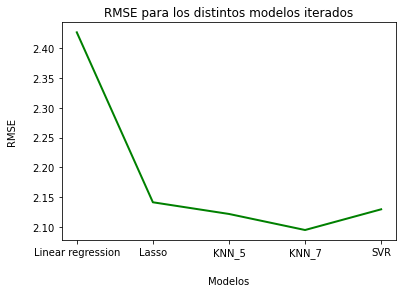

In [66]:
# Se grafica los RMSE para los distintos modelos
plt.figure(figsize=(10,5))
fig7, ax7 = plt.subplots()
ax7.plot(RMSE_CBF_df.Model, RMSE_CBF_df.RMSE, label="RMSE", color='green', linewidth=2)
plt.xlabel("Modelos", labelpad=18)
plt.ylabel("RMSE", labelpad=15)
plt.title("RMSE para los distintos modelos iterados")
plt.show()

Entre KNN 5 y KNN 7, se opta por el primero. Puesto que para recomendar un anime, bastará con que el usuario haya valorado 5 animes para poder utilizar el modelo y obtener recomendaciones de éste.

<Figure size 720x360 with 0 Axes>

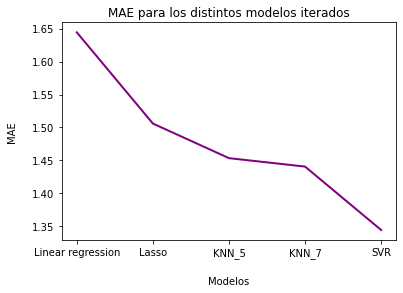

In [67]:
# Se grafica los MAE para los distintos modelos
plt.figure(figsize=(10,5))
fig7, ax7 = plt.subplots()
ax7.plot(RMSE_CBF_df.Model, RMSE_CBF_df.MAE, label="MAE", color='purple', linewidth=2)
plt.xlabel("Modelos", labelpad=18)
plt.ylabel("MAE", labelpad=15)
plt.title("MAE para los distintos modelos iterados")
plt.show()

De acuerdo al MAE, KNN 5 y KNN 7 tienen similar desempeño. Se reitera la decisión de tomar KNN 5, es más rapido que un KNN 7 en sus calculos, el usuario puede ingresar al modelo habiendo calificado 5 animes. 

In [68]:
%time
# Se reentrena el modelo utilizando el KNN_5
model_KNN5 = KNeighborsRegressor(n_neighbors=5)

CBF_predictions = []

# Para cada usuario en los datos de entrenamiento:
for i, j in enumerate(x_train_listed):
    model_KNN5.fit(x_train_listed[i], y_train_listed[i])
    prediction = model_KNN5.predict(all_animes)
    prediction = np.clip(prediction, 1, 10)
    CBF_predictions.append(prediction)

# Se crea df con las predicciones
CBF_model_KNN5 = pd.DataFrame(CBF_predictions, index=user_ids, columns=anime_ids)
CBF_model_KNN5

CPU times: total: 0 ns
Wall time: 0 ns


,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
17,2.8,8.0,4.4,6.4,4.4,8.8,8.0,6.2,4.8,4.4,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.6
27,8.2,9.2,8.6,8.2,8.6,8.0,8.6,8.4,8.6,8.6,...,8.2,8.4,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.2
31,8.4,4.6,6.0,7.2,6.0,8.6,7.8,6.0,6.2,6.0,...,6.2,6.4,6.2,6.2,6.2,6.2,6.2,6.2,6.2,7.6
40,9.0,9.4,9.4,8.4,9.4,8.6,8.8,8.8,9.2,9.4,...,8.4,8.8,8.4,8.4,8.4,8.4,8.4,8.4,8.4,7.6
50,7.6,7.8,7.6,7.4,7.6,8.4,7.2,8.8,9.2,7.6,...,7.8,7.4,7.8,7.8,7.8,7.8,7.8,7.8,7.8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,8.4,8.2,7.4,8.2,7.4,7.6,7.0,7.6,9.0,7.4,...,5.2,6.8,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.8
73392,8.2,8.0,8.6,9.2,8.6,8.8,8.6,8.4,9.0,8.6,...,9.0,9.4,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.2
73441,6.2,4.4,5.6,5.2,5.6,5.4,7.0,3.0,4.6,5.6,...,4.0,4.4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
73449,7.6,7.4,6.8,7.6,6.8,7.4,8.2,8.2,8.0,6.8,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.4


Probamos con lasso igual, al ser un algoritmo mas simple al knn y tener métricas similares.

In [69]:
%time
# Se reentrena el modelo utilizando modelo lasso
model_lasso = Lasso(alpha=1.0, max_iter=10000)

# Se guardan en listas los modelos utilizados y respectivo RMSE
CBF_predictions = []

# Para cada usuario en los datos de entrenamiento:
for i, j in enumerate(x_train_listed):
    model_lasso.fit(x_train_listed[i], y_train_listed[i])
    prediction = model_lasso.predict(all_animes)
    prediction = np.clip(prediction, 1, 10)
    CBF_predictions.append(prediction)
    
# Se crea df con las predicciones
CBF_model_lasso = pd.DataFrame(CBF_predictions, index=user_ids, columns=anime_ids)
CBF_model_lasso 

CPU times: total: 0 ns
Wall time: 0 ns


,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
17,4.443946,4.603352,4.603352,4.603352,4.603352,4.603352,4.603352,4.443946,4.443946,4.603352,...,4.443946,4.443946,4.443946,4.443946,4.443946,4.443946,4.443946,4.443946,4.443946,4.443946
27,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,...,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852,8.351852
31,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,...,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689,7.278689
40,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,...,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000,8.575000
50,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,...,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310,7.879310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,...,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935,7.669935
73392,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,...,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000,8.600000
73441,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,...,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882,4.705882
73449,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,...,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882,7.705882


__Observamos que las predicciones por usuarios permanecen casi constante, lo que no es útil al momento de querer recomendar un anime a un usuario en particular. Por ello se descarta la opción de utilizar el modelo Lasso, a pesar de tener bajas metricas y requerir menor capacidad de computo__. 

In [70]:
print(f'Existe una disminución del {round(((3.311-2.125)/3.311)*100,2)} % comparando el modelo KNN_5 con el baseline en cuanto a la metrica RMSE')
print(f'Existe una disminución del {round(((2.597-1.451)/2.597)*100,2)} % comparando el modelo KNN_5 con el baseline en cuanto a la metrica MAE')

Existe una disminución del 35.82 % comparando el modelo KNN_5 con el baseline en cuanto a la metrica RMSE
Existe una disminución del 44.13 % comparando el modelo KNN_5 con el baseline en cuanto a la metrica MAE


In [71]:
## Exportación del modelo KNN_5
with open('model_KNN5', 'wb') as to_write:
    pickle.dump(model_KNN5, to_write)

### 4.3.- Predicciones y recomendaciones utilizando KNN

In [72]:
def gustos_user(index):
    '''
    Esta funcion retorna los animes que ha visto/valorado determinado usuario.
    
    Parametro:
        'index' = indice asociado a un usuario dentro de la matriz de predicciones del modelo.
    
    '''
    
    print('')
    print(f'\033[1mLos gustos del usuario {CBF_model_KNN5.index[index]} son:\033[0m')
    user = CBF_model_KNN5.index[index]
    
    merge = pd.merge(df_rating, df_animes, on='anime_id')
    merge = merge[merge['user_id']==user]
    merge = merge.rename(columns={'rating_x':'rating'}).drop(columns='rating_y')
    return merge.sort_values(by='rating', ascending=False)

In [73]:
gustos_user(2915)


Los gustos del usuario 39910 son:


,user_id,anime_id,rating,name,genre,type,episodes,members
3182,39910,223,10,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,316102
190447,39910,3588,10,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,580184
306964,39910,813,10,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,291,375662
427858,39910,44,10,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,129307
633416,39910,901,10,"Dragon Ball Z Movie 08: Moetsukiro!! Nessen, R...","Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Movie,1,65953
154182,39910,1535,10,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
680367,39910,903,10,Dragon Ball Z Movie 10: Kiken na Futari! Super...,"Action, Adventure, Comedy, Demons, Fantasy, Ma...",Movie,1,54947
642481,39910,905,10,Dragon Ball Z Movie 12: Fukkatsu no Fusion!! G...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Movie,1,56994
641852,39910,899,9,Dragon Ball Z Movie 06: Gekitotsu!! 100-oku Po...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Movie,1,55789
667615,39910,898,9,Dragon Ball Z Movie 05: Tobikkiri no Saikyou t...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Movie,1,59207


In [74]:
def predict_user(index, top=None):
    '''
    Esta funcion retorna las 'top' recomendaciones de anime ordenadas de mayor a menor para el usuario.
    Parametros:
        'index'= indice asociado a un usuario dentro de la matriz de predicciones del modelo.
        'top' = por defecto 'None'. El valor ingresado determinara el numero de animes que se muestran en pantalla.
    
    
    '''
        
    print('')
    print(f'\033[1mLas recomendaciones para el usuario {CBF_model_KNN5.index[index]} son:\033[0m')
    user = CBF_model_KNN5.index[index]
    recom = pd.DataFrame(CBF_model_KNN5.values[index])
    recom['1'] = index=CBF_model_KNN5.columns
    recom.columns = ['rating_predict','anime_id']
    recom = pd.merge(recom, df_animes, on='anime_id').sort_values(by='rating_predict', ascending=False)
    
    df_rating_usuario = df_rating_recomen[df_rating_recomen['user_id'] == user]
    
    merge = pd.merge(recom, df_rating_usuario, on='anime_id')
    
    recomendacion = pd.merge(recom, merge, on='anime_id', how='left' ).sort_values(by='rating_y', ascending=False)
    recomendacion = recomendacion.rename(columns={'rating_predict_x':'rating_predict',
                           'name_x':'name',
                           'genre_x':'genre',
                           'type_x':'type',
                           'episodes_x':'episodes',
                           'members_x':'members',
                           'rating_y':'rating_real'})
    recomendacion.drop(columns=['rating_predict_y', 'name_y', 'genre_y', 'type_y', 'episodes_y',
                  'rating_x', 'members_y', 'rating'], inplace=True)

    recomendacion['rating_real'] = recomendacion['rating_real'].fillna(0)
    recomendacion['user_id'] = user
    return recomendacion.sort_values(by='rating_predict', ascending=False).head(top)

In [75]:
predict_user(2915, 21)


Las recomendaciones para el usuario 39910 son:


,rating_predict,anime_id,name,genre,type,episodes,members,user_id,rating_real
6,10.0,34151,Landreaall,"Action, Adventure, Fantasy, Martial Arts, Romance",OVA,-1,414,39910,0.0
7,10.0,1658,Karakuri no Kimi,"Action, Comedy, Fantasy, Historical, Horror, M...",OVA,1,2884,39910,0.0
5,10.0,33258,Qin Shiming Yue Zhi: Guoqing Tebie Pian,"Action, Comedy, Fantasy, Historical, Martial Arts",ONA,1,96,39910,0.0
4,10.0,11813,Shijou Saikyou no Deshi Kenichi OVA,"Action, Comedy, Martial Arts, School, Shounen",OVA,11,24167,39910,0.0
3,10.0,1009,Battle Spirits: Ryuuko no Ken,"Action, Comedy, Martial Arts, Shounen",OVA,1,1708,39910,0.0
2,10.0,2050,Honoo no Tenkousei,"Action, Comedy, Martial Arts, Parody, School, ...",OVA,2,2688,39910,0.0
1,10.0,839,Samurai Spirits 2: Asura Zanmaden,"Action, Fantasy, Martial Arts, Samurai, Super ...",OVA,2,1317,39910,0.0
0,10.0,24171,Mushibugyou OVA,"Action, Fantasy, Historical, Martial Arts, Sam...",OVA,3,3636,39910,0.0
12,9.8,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,84527,39910,0.0
10,9.8,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,83515,39910,0.0


### 4.4.- Test y evaluación final
Esta vez utilizaremos lasso, para corroborar las predicciones y recomendaciones que se obtienen mediante este modelo, en los datos de testeo.

In [76]:
%time
# Se utiliza modelo lasso para aplicar en datos de testeo
CBF_predictions_test = []
for index, row in X_test.iterrows():
    user_predictions = CBF_model_lasso.loc[row["user_id"], row["anime_id"]]
    CBF_predictions_test.append(user_predictions)

print("RMSE Lasso:", sqrt(mean_squared_error(y_test, CBF_predictions_test)))

CPU times: total: 0 ns
Wall time: 0 ns
RMSE Lasso: 2.13213525283272


In [77]:
# Se crea funcion para observar que animes ha visto el usuario en el conjunto de datos
def user_ha_visto_test(user, include_zero=False):
    merge = pd.merge(df_rating_recomen, df_animes, on='anime_id')
    merge.drop(columns = 'rating_y', inplace=True)
    merge = merge.rename(columns={'rating_x':'rating_real'})
    merge
    
    if include_zero == False:
        filtro = merge[(merge['user_id'] == user)]
    else:
        filtro = merge[(merge['user_id'] == user) & (merge['rating_real'] != 0)]
        
    return filtro.sort_values(by='rating_real', ascending=False)

In [78]:
user_ha_visto_test(6162, True)

,user_id,anime_id,rating_real,name,genre,type,episodes,members
126215,6162,2001,10,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,562962
5611538,6162,7411,10,Kanojo x Kanojo x Kanojo: Sanshimai to no Doki...,"Harem, Hentai",OVA,3,14138
5538441,6162,6862,10,K-On!: Live House!,"Comedy, Music, School, Slice of Life",Special,1,70787
5531320,6162,3470,10,Special A,"Comedy, Romance, School, Shoujo",TV,24,173603
5377419,6162,10161,10,No.6,"Action, Sci-Fi",TV,11,168017
...,...,...,...,...,...,...,...,...
4801759,6162,10519,2,Mahou Shoujo Sonico★Magica,"Music, Parody",ONA,1,13266
7365405,6162,9744,2,Issho ni Training Ofuro: Bathtime with Hinako ...,"Ecchi, Sports",OVA,1,5779
1747240,6162,4970,2,Afro Samurai: Resurrection,"Action, Adventure, Samurai",Movie,1,51064
2312533,6162,3702,2,Detroit Metal City,"Comedy, Music",OVA,12,104893


In [79]:
# Se crea funcion para visualizar las recomendaciones para los usuarios en el conjunto de datos (data frame)
def recomendacion_test(user):
    df_pr = X_test.copy()
    df_pr['predict_rating'] = CBF_predictions_test
    df_pr['rating_real'] = y_test
      
    merge = pd.merge(df_pr, df_animes, on='anime_id')
    merge = merge[merge['user_id'] == user]
     
    return merge.sort_values(by='predict_rating', ascending=False).head(10)   

In [80]:
recomendacion_test(6162)

,user_id,anime_id,predict_rating,rating_real,name,genre,type,episodes,rating,members
0,6162,2176,7.650092,6,Kiddy Grade: Ignition,"Action, Mecha, Sci-Fi, Super Power",Movie,1,7.21,3466
88656,6162,704,7.650092,10,Kanon Kazahana,"Drama, Romance, Slice of Life, Supernatural",Special,1,6.90,9693
97898,6162,9347,7.650092,6,Fortune Arterial: Akai Yakusoku - Tadoritsuita...,"Comedy, Fantasy, Harem, Romance, Vampire",OVA,1,7.03,18682
97816,6162,108,7.650092,8,Ou Dorobou Jing in Seventh Heaven,"Adventure, Comedy, Fantasy, Psychological, Sho...",OVA,3,7.43,8561
95310,6162,14511,7.650092,10,Minami-ke Tadaima,"Comedy, School, Slice of Life",TV,13,7.78,31394
93570,6162,4793,7.650092,4,Pokemon: Pichu to Pikachu,"Adventure, Comedy, Fantasy, Kids",Movie,1,6.79,22352
93456,6162,2564,7.650092,8,Code-E,"Comedy, Romance, School, Sci-Fi, Slice of Life",TV,12,6.52,12238
93280,6162,1359,7.650092,10,Nikutai Ten&#039;i,"Hentai, Yuri",OVA,2,6.47,6551
92737,6162,10163,7.650092,10,C: The Money of Soul and Possibility Control,"Action, Mystery, Super Power, Thriller",TV,11,7.44,156853
91693,6162,9925,7.650092,10,Amagami SS: Tachibana Miya-hen - Imouto,School,Special,1,7.35,31019


__Observamos que el modelo KNN5 además de tener mejores metricas que el modelo lasso, éste entrega predicciones que no son útiles al momento de ordenar las recomendaciones a cada usuario. Lasso por su parte, al requerir menor capacidad de computo, se planteaba como una buena solución pero, se ha observado que su desempeño al momento de recomendar animes, no es el mas óptimo.__

### 4.5.- Modelo ranking popular.
Esta técnica descriptiva, se utilizará para evitar el problema del "cold-start", donde usuarios nuevos no han valorado animes a la páginas como tampoco a los nuevos suscriptores que no tienen data histórica de animes. Por lo tanto no tenemos información para entregar al modelo y conocer sus preferencias. Se recomendarán los 10 animes considerando aquellos con mas de 700 valoraciones, ordenados de mayor a menor con respecto a su rating promedio.

<AxesSubplot:xlabel='rating', ylabel='count'>

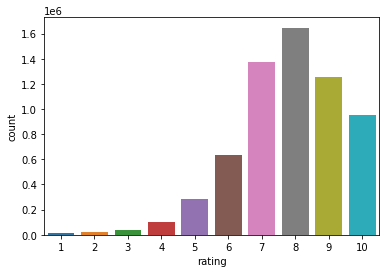

In [81]:
# Solo consideramos animes calificados para revisar promedio de calificaciones por anime
df_rating_clean = df_rating_recomen[df_rating_recomen['rating'] !=0]
sns.countplot(df_rating_clean['rating'])

In [82]:
# Unimos la data
rank_popular = df_rating_clean.merge(df_animes, left_on = 'anime_id', right_on = 'anime_id')[['user_id', 'anime_id',
                                                                                                      'rating_x', 'name']]
rank_popular.head()

,user_id,anime_id,rating_x,name
0,1,8074,10,Highschool of the Dead
1,3,8074,6,Highschool of the Dead
2,5,8074,2,Highschool of the Dead
3,12,8074,6,Highschool of the Dead
4,14,8074,6,Highschool of the Dead


In [83]:
# Obtenemos dataset con cantidad de valoraciones "ratings" y "rating promedio" por anime
ratings_promedio = rank_popular.pivot_table(index='name', values = 'rating_x', aggfunc = [len, np.mean])
ratings_promedio.columns = ['ratings', 'rating_promedio']
ratings_promedio

,ratings,rating_promedio
name,,
&quot;0&quot;,17,4.764706
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1,1.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,635,7.343307
&quot;Bungaku Shoujo&quot; Memoire,662,7.744713
&quot;Bungaku Shoujo&quot; Movie,1295,7.840154
...,...,...
xxxHOLiC Kei,2796,8.424535
xxxHOLiC Movie: Manatsu no Yoru no Yume,1889,8.156697
xxxHOLiC Rou,1190,8.412605


In [84]:
# Se calcula cuantas calificaciones en promedio tiene un anime, el cual es cercano a las 650
ratings_promedio = ratings_promedio.sort_values(by='ratings', ascending=False)
ratings_promedio['ratings'].mean()

638.4484182953859

In [85]:
# Se crea el ranking popular top 10 a partir de animes con mas de 700 valoraciones
# Ordenados con su rating promedio de mayor a menor
ratings_promedio[ratings_promedio['ratings'] > 700].sort_values(by='rating_promedio', ascending=False).head(10)

,ratings,rating_promedio
name,,
Gintama°,1188,9.449495
Kimi no Na wa.,1961,9.426313
Ginga Eiyuu Densetsu,803,9.389788
Fullmetal Alchemist: Brotherhood,21494,9.322741
Gintama&#039;,3115,9.272552
Steins;Gate,17151,9.261326
Gintama,4264,9.236398
Hunter x Hunter (2011),7477,9.234586
Gintama&#039;: Enchousen,2126,9.202258
